<a href="https://colab.research.google.com/github/itumor/colab/blob/master/Algorithmic_Trading_Strategy_Using_MACD_%26_Python_amz_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from datetime import datetime
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
stock ='AMZN'
startdate = '2020-4-01'
enddate = datetime.today().strftime('%Y-%m-%d')
investment = 20000

In [3]:
df = web.DataReader(stock, data_source='yahoo',start = startdate, end = enddate)
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-04-01,1944.959961,1893.000000,1932.969971,1907.699951,4111100,1907.699951
2020-04-02,1927.530029,1890.000000,1901.640015,1918.829956,4336000,1918.829956
2020-04-03,1926.329956,1889.150024,1911.150024,1906.589966,3609900,1906.589966
2020-04-06,1998.520020,1930.020020,1936.000000,1997.589966,5773200,1997.589966
2020-04-07,2035.719971,1997.619995,2017.109985,2011.599976,5114000,2011.599976
...,...,...,...,...,...,...
2020-09-25,3101.540039,2999.000000,3054.860107,3095.129883,4615200,3095.129883
2020-09-28,3175.040039,3117.169922,3148.850098,3174.050049,4224200,3174.050049
2020-09-29,3188.260010,3132.540039,3175.389893,3144.879883,3495800,3144.879883


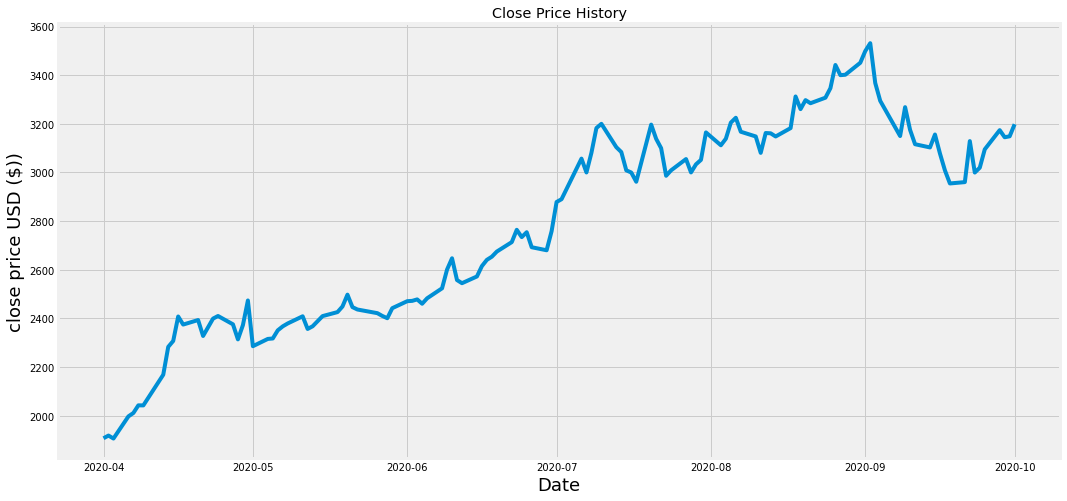

In [4]:

plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('close price USD ($))', fontsize=18)
plt.show()

In [5]:
ShortEMA = df.Close.ewm(span=12, adjust=False).mean()
LongEMA = df.Close.ewm(span=26, adjust=False).mean()
MACD = ShortEMA - LongEMA
signal = MACD.ewm(span=9, adjust=False).mean()

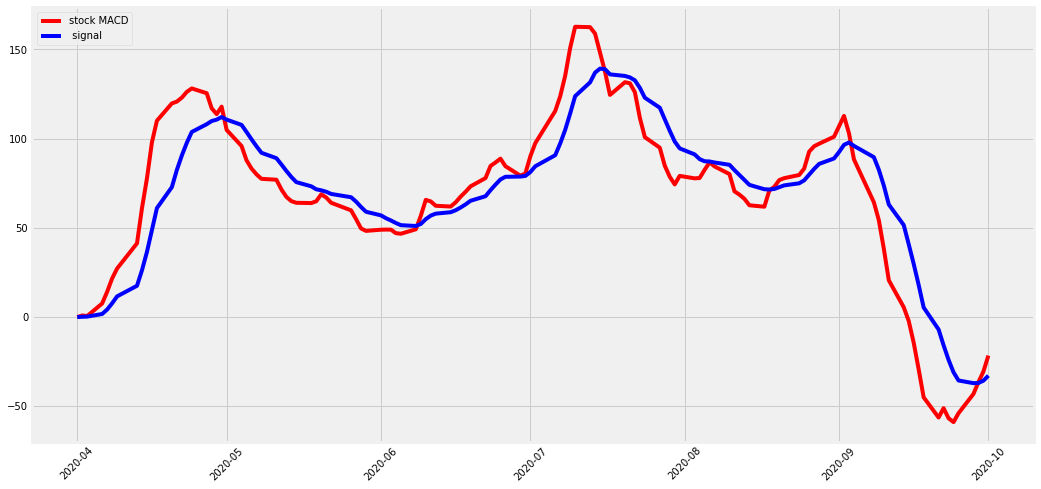

In [6]:
plt.figure(figsize=(16,8))
plt.plot(df.index, MACD, label = 'stock MACD', color='red')
plt.plot(df.index, signal, label = ' signal', color='blue' )
plt.xticks(rotation = 45 )
plt.legend(loc='upper left')
plt.show()

In [7]:
df['MACD']  = MACD
df['signal'] = signal
df

,High,Low,Open,Close,Volume,Adj Close,MACD,signal
Date,,,,,,,,
2020-04-01,1944.959961,1893.000000,1932.969971,1907.699951,4111100,1907.699951,0.000000,0.000000
2020-04-02,1927.530029,1890.000000,1901.640015,1918.829956,4336000,1918.829956,0.887864,0.177573
2020-04-03,1926.329956,1889.150024,1911.150024,1906.589966,3609900,1906.589966,0.596956,0.261449
2020-04-06,1998.520020,1930.020020,1936.000000,1997.589966,5773200,1997.589966,7.621493,1.733458
2020-04-07,2035.719971,1997.619995,2017.109985,2011.599976,5114000,2011.599976,14.155800,4.217926
...,...,...,...,...,...,...,...,...
2020-09-25,3101.540039,2999.000000,3054.860107,3095.129883,4615200,3095.129883,-53.885247,-35.528186
2020-09-28,3175.040039,3117.169922,3148.850098,3174.050049,4224200,3174.050049,-43.075949,-37.037738
2020-09-29,3188.260010,3132.540039,3175.389893,3144.879883,3495800,3144.879883,-36.443197,-36.918830


In [8]:
def buy_sell(signal):
   Buy = []
   Sell = []
   flag = -1

   for i in range(0, len(signal)):
     if signal['MACD'][i] > signal['signal'][i]:
       Sell.append(np.nan)
       if flag != 1:
         Buy.append(signal['Close'][i])
         flag = 1
       else:
           Buy.append(np.nan)
     elif signal['MACD'][i] < signal['signal'][i]:
       Buy.append(np.nan)
       if flag != 0:
         Sell.append(signal['Close'][i])
         flag = 0 
       else:
           Sell.append(np.nan)
     else:
       Buy.append(np.nan)
       Sell.append(np.nan)

   return (Buy, Sell)


In [9]:
a = buy_sell(df)
df['Buy_Signal_Price'] = a[0]
df['Sell_signal_Price'] = a[1]



In [10]:
df


,High,Low,Open,Close,Volume,Adj Close,MACD,signal,Buy_Signal_Price,Sell_signal_Price
Date,,,,,,,,,,
2020-04-01,1944.959961,1893.000000,1932.969971,1907.699951,4111100,1907.699951,0.000000,0.000000,NaN,NaN
2020-04-02,1927.530029,1890.000000,1901.640015,1918.829956,4336000,1918.829956,0.887864,0.177573,1918.829956,NaN
2020-04-03,1926.329956,1889.150024,1911.150024,1906.589966,3609900,1906.589966,0.596956,0.261449,NaN,NaN
2020-04-06,1998.520020,1930.020020,1936.000000,1997.589966,5773200,1997.589966,7.621493,1.733458,NaN,NaN
2020-04-07,2035.719971,1997.619995,2017.109985,2011.599976,5114000,2011.599976,14.155800,4.217926,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2020-09-25,3101.540039,2999.000000,3054.860107,3095.129883,4615200,3095.129883,-53.885247,-35.528186,NaN,NaN
2020-09-28,3175.040039,3117.169922,3148.850098,3174.050049,4224200,3174.050049,-43.075949,-37.037738,NaN,NaN
2020-09-29,3188.260010,3132.540039,3175.389893,3144.879883,3495800,3144.879883,-36.443197,-36.918830,3144.879883,NaN


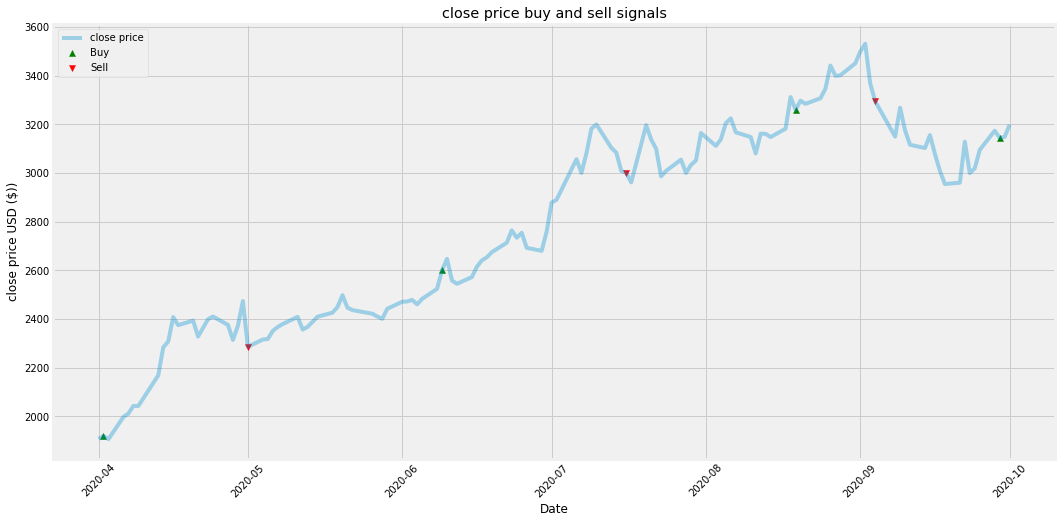

In [11]:
plt.figure(figsize=(16,8))
plt.scatter(df.index, df['Buy_Signal_Price'], color='green', label='Buy', marker='^', alpha = 1 )
plt.scatter(df.index, df['Sell_signal_Price'], color='red', label='Sell', marker='v' , alpha = 1 )
plt.plot(df['Close'],label='close price', alpha = 0.35)
plt.title('close price buy and sell signals')
plt.xlabel('Date')
plt.ylabel('close price USD ($))')
plt.legend(loc = 'upper left')
plt.xticks(rotation = 45 )
plt.show()

In [12]:
Buy_Signal_Price = df[df['Buy_Signal_Price'].notnull()]


Buy_Signal_Price['Buy_Sell'] = 'Buy'
Buy_Signal_Price.sort_index()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,High,Low,Open,Close,Volume,Adj Close,MACD,signal,Buy_Signal_Price,Sell_signal_Price,Buy_Sell
Date,,,,,,,,,,,
2020-04-02,1927.530029,1890.000000,1901.640015,1918.829956,4336000,1918.829956,0.887864,0.177573,1918.829956,NaN,Buy
2020-06-09,2626.429932,2525.000000,2529.439941,2600.860107,5176000,2600.860107,56.715850,52.174484,2600.860107,NaN,Buy
2020-08-19,3315.899902,3256.000000,3303.010010,3260.479980,4185100,3260.479980,73.004613,71.789374,3260.479980,NaN,Buy
2020-09-29,3188.260010,3132.540039,3175.389893,3144.879883,3495800,3144.879883,-36.443197,-36.918830,3144.879883,NaN,Buy


In [13]:

Sell_signal_Price =  df[df['Sell_signal_Price'].notnull()]
Sell_signal_Price['Buy_Sell'] = 'Sell'                  

Sell_signal_Price.sort_index()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,High,Low,Open,Close,Volume,Adj Close,MACD,signal,Buy_Signal_Price,Sell_signal_Price,Buy_Sell
Date,,,,,,,,,,,
2020-05-01,2362.439941,2258.189941,2336.800049,2286.040039,9772600,2286.040039,104.882399,110.649296,NaN,2286.040039,Sell
2020-07-16,3032.000000,2918.229980,2971.060059,2999.899902,6394200,2999.899902,137.484936,138.889130,NaN,2999.899902,Sell
2020-09-04,3381.500000,3111.129883,3318.000000,3294.620117,8781800,3294.620117,88.363868,95.925730,NaN,3294.620117,Sell


In [14]:
 
 frames = [Sell_signal_Price, Buy_Signal_Price]
 frames

 result = pd.concat(frames)
 result

result = result.sort_index()
resultc =  result['Close'].to_numpy()



input = investment  




ns = 0 

 for index, row in  result.iterrows(): 

    if (row['Buy_Sell'] == 'Buy' ):
      ns = input / row['Close']   
    else:
      if (ns == 0 ):
        print('x')
      else:
        input = ns * row['Close'] 


(input  - investment ) * 100 / investment 


38.85480764328958

In [15]:
ns = 0 
input = investment 
ar = result.to_numpy()
i= 0
lens = len(ar)

print(input)
for i, row in enumerate(result.itertuples(), 1):
    
    if (row[11] == 'Buy' and i == int(lens) ):
      print(input)
    else:  
       if (row[11] == 'Buy' ):
          ns = input / row[4] 
          
       else:
         if (ns == 0 ):
          print('')
         else:
          input = ns * row[4]
          print(input)




20000
23827.43746363888
27483.18801011069
27770.961528657917
27770.961528657917


In [16]:
(input  - investment ) * 100 / investment 

38.85480764328958

In [17]:
(input - investment)

7770.961528657917

In [18]:
result

,High,Low,Open,Close,Volume,Adj Close,MACD,signal,Buy_Signal_Price,Sell_signal_Price,Buy_Sell
Date,,,,,,,,,,,
2020-04-02,1927.530029,1890.000000,1901.640015,1918.829956,4336000,1918.829956,0.887864,0.177573,1918.829956,NaN,Buy
2020-05-01,2362.439941,2258.189941,2336.800049,2286.040039,9772600,2286.040039,104.882399,110.649296,NaN,2286.040039,Sell
2020-06-09,2626.429932,2525.000000,2529.439941,2600.860107,5176000,2600.860107,56.715850,52.174484,2600.860107,NaN,Buy
2020-07-16,3032.000000,2918.229980,2971.060059,2999.899902,6394200,2999.899902,137.484936,138.889130,NaN,2999.899902,Sell
2020-08-19,3315.899902,3256.000000,3303.010010,3260.479980,4185100,3260.479980,73.004613,71.789374,3260.479980,NaN,Buy
2020-09-04,3381.500000,3111.129883,3318.000000,3294.620117,8781800,3294.620117,88.363868,95.925730,NaN,3294.620117,Sell
2020-09-29,3188.260010,3132.540039,3175.389893,3144.879883,3495800,3144.879883,-36.443197,-36.918830,3144.879883,NaN,Buy



Profit (P) = ( (SP * NS) - SC ) - ( (BP * NS) + BC )


#*



NS is the number of shares,

SP is the selling price per share,

BP is the buying price per share,

SC is the selling commission,

BC is the buying commission.

https://goodcalculators.com/stock-calculator/
© 2015-2020 goodcalculators.com

*/#

In [19]:
result

,High,Low,Open,Close,Volume,Adj Close,MACD,signal,Buy_Signal_Price,Sell_signal_Price,Buy_Sell
Date,,,,,,,,,,,
2020-04-02,1927.530029,1890.000000,1901.640015,1918.829956,4336000,1918.829956,0.887864,0.177573,1918.829956,NaN,Buy
2020-05-01,2362.439941,2258.189941,2336.800049,2286.040039,9772600,2286.040039,104.882399,110.649296,NaN,2286.040039,Sell
2020-06-09,2626.429932,2525.000000,2529.439941,2600.860107,5176000,2600.860107,56.715850,52.174484,2600.860107,NaN,Buy
2020-07-16,3032.000000,2918.229980,2971.060059,2999.899902,6394200,2999.899902,137.484936,138.889130,NaN,2999.899902,Sell
2020-08-19,3315.899902,3256.000000,3303.010010,3260.479980,4185100,3260.479980,73.004613,71.789374,3260.479980,NaN,Buy
2020-09-04,3381.500000,3111.129883,3318.000000,3294.620117,8781800,3294.620117,88.363868,95.925730,NaN,3294.620117,Sell
2020-09-29,3188.260010,3132.540039,3175.389893,3144.879883,3495800,3144.879883,-36.443197,-36.918830,3144.879883,NaN,Buy


In [20]:
Sell_signal_Pricef = df[df['Sell_signal_Price'].notnull()]['Sell_signal_Price']
Sell_signal_Pricef



Date
2020-05-01    2286.040039
2020-07-16    2999.899902
2020-09-04    3294.620117
Name: Sell_signal_Price, dtype: float64

In [21]:
Buy_Signal_Pricef = df[df['Buy_Signal_Price'].notnull()] ['Buy_Signal_Price'] 
Buy_Signal_Pricef

Date
2020-04-02    1918.829956
2020-06-09    2600.860107
2020-08-19    3260.479980
2020-09-29    3144.879883
Name: Buy_Signal_Price, dtype: float64